Римарович Павло, ФІТ, 4-4
Варіант 22

Завдання 1. Виведіть перші 5 рядків таблиці. 

In [79]:
import pandas as pd 

import numpy as np 

# Зчитуємо дані з вказаного URL 
url = "https://uk.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B5%D0%B4%D0%BD%D1%8F_%D0%B7%D0%B0%D1%80%D0%BE%D0%B1%D1%96%D1%82%D0%BD%D0%B0_%D0%BF%D0%BB%D0%B0%D1%82%D0%B0_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96" 

# Зчитуємо таблицю в DataFrame 
data = pd.read_html(url, header=0)[2]  # Обираємо другий елемент списку, де знаходиться таблиця 

df_1 = data.head(5) 

# Виводимо перші 5 рядків таблиці 
print(df_1) 

    Рік В національній валюті В доларах США  \
0  1992              5832,88▲        28,04▼   
1  1993               163533▲        36,03▲   
2  1994              1426343▲        44,99▲   
3  1995              7304000▲        49,53▲   
4  1996               125,23▼        68,45▲   

  Кількість кг хліба[20] на середню зарплату  \
0                                   1015,67▲   
1                                    430,42▼   
2                                    372,76▼   
3                                    201,76▼   
4                                    198,62▼   

  Кількість БігМаків на середню зарплату  
0                                      —  
1                                      —  
2                                      —  
3                                      —  
4                                      —  


Завдання 2. Визначте кількість рядків і стовпчиків за допомогою атрибуту shape.

In [80]:

# Визначаємо кількість рядків і стовпчиків всієї таблиці
total_rows, total_columns = data.shape
print(f"Кількість рядків: {total_rows}, кількість стовпчиків: {total_columns}")

Кількість рядків: 32, кількість стовпчиків: 5


Завдання 3. Визначте загальну кількість років та кількість місяців у даних. 

In [81]:
# Визначаємо кількість унікальних значень у стовпці "Рік"
total_years = data['Рік'].nunique()

# Визначаємо кількість унікальних значень у стовпці "Місяць"
total_months = total_years*12

print(f"Загальна кількість років: {total_years}, загальна кількість місяців: {total_months}")

Загальна кількість років: 32, загальна кількість місяців: 384


Завдання 4. Замінити пропущені значення  «-» в таблиці на NaN 

In [82]:
data.replace("-", np.nan, inplace=True)

Завдання 5. Визначити тип стовпців за допомогою dtypes. 

In [83]:
# Визначаємо типи стовпців
column_types = data.dtypes
print(column_types)

Рік                                           object
В національній валюті                         object
В доларах США                                 object
Кількість кг хліба[20] на середню зарплату    object
Кількість БігМаків на середню зарплату        object
dtype: object


Завдання 6. Видаліть передостанній і останній стовпчики ( Кількість кгхліба[20] на середнюзарплату,  Кільксть БігМаків на середню зарплату). Далі працюйте з оновленою таблицею.  

In [84]:
data.drop(data.columns[-2:], axis=1, inplace=True)

Завдання 7. Замінити тип нечислових даних на числові. 

In [85]:
# Перевірка, чи можливо конвертувати значення в числовий тип
for column in data.columns:
    if data[column].dtype == object:  # Перевіряємо чи тип даних є "object" (строка)
        try:
            data[column] = data[column].str.replace(',', '.')
            data[column] = data[column].str.replace('*', '')
            data[column] = data[column].str.replace('▼', '')
            data[column] = data[column].str.replace('▲', '')
            data[column] = pd.to_numeric(data[column])
        except ValueError as e:
            print(f"Не вдалося конвертувати стовпець {column} в числовий тип: {e}")

Завдання 8. Порахуйте частку пропусків в кожній колонці (за допомогою методів isnull , sum, len) 

In [86]:
# Порахунок пропусків для кожного стовпця
missing_ratios = data.isnull().sum() / len(df_1)

# Вивід частки пропусків для кожного стовпця
print(missing_ratios)

Рік                      0.0
В національній валюті    0.0
В доларах США            0.0
dtype: float64


Завдання 9. Замініть всі пропущені значення на середні значення по (стовпцю). 

In [87]:
# Заміна пропущених значень на середнє
data.fillna(data.mean(numeric_only=True), inplace=True)

Завдання 10. Знайдіть рік з найвищою зарплатою в Україні в грн і вкажіть цю зарплату.  

In [88]:
# Знайдемо рік з найвищою зарплатою
highest_salary_year = data['В національній валюті'].idxmax()
highest_salary = data.loc[highest_salary_year, 'В національній валюті']

print(f"Рік з найвищою зарплатою: {highest_salary_year}, Зарплата: {highest_salary} грн")

Рік з найвищою зарплатою: 3, Зарплата: 7304000.0 грн


Завдання 11. Знайдіть рік з мінімальною  зарплатою в Україні в дол. США і вкажіть цю зарплату. 

In [89]:
# Заміна пропущених значень на середнє
data.fillna(data.mean(numeric_only=True), inplace=True)

# Конвертація валюти з гривень в долари США (припустимо, що курс 1 долар = 27 гривень)
data['В доларах США'] = data['В національній валюті'] / 27

# Знайдемо рік з мінімальною зарплатою в доларах США
lowest_salary_id = data['В доларах США'].idxmin()
lowest_salary_year = data.loc[lowest_salary_id, 'Рік']
lowest_salary = data.loc[lowest_salary_id, 'В доларах США']

print(f"Рік з мінімальною зарплатою в доларах США: {lowest_salary_year}, Зарплата: {lowest_salary} USD")

Рік з мінімальною зарплатою в доларах США: 1996, Зарплата: 4.638148148148148 USD


Завдання 12. Виведіть роки, коли зарплата в грн була вище середньої 

In [90]:
# Розрахунок середньої зарплати в гривнях
average_salary = data['В національній валюті'].mean()

# Вибір років, де зарплата в гривнях була вище середньої
years_above_average = data[data['В національній валюті'] > average_salary]['Рік']

print(f"Роки, коли зарплата в гривнях була вище середньої:")
print(years_above_average)

Роки, коли зарплата в гривнях була вище середньої:
2    1994
3    1995
Name: Рік, dtype: int64


Завдання 13. Створіть графік, що відображає  зарплату в Україні з часом (за роками). 

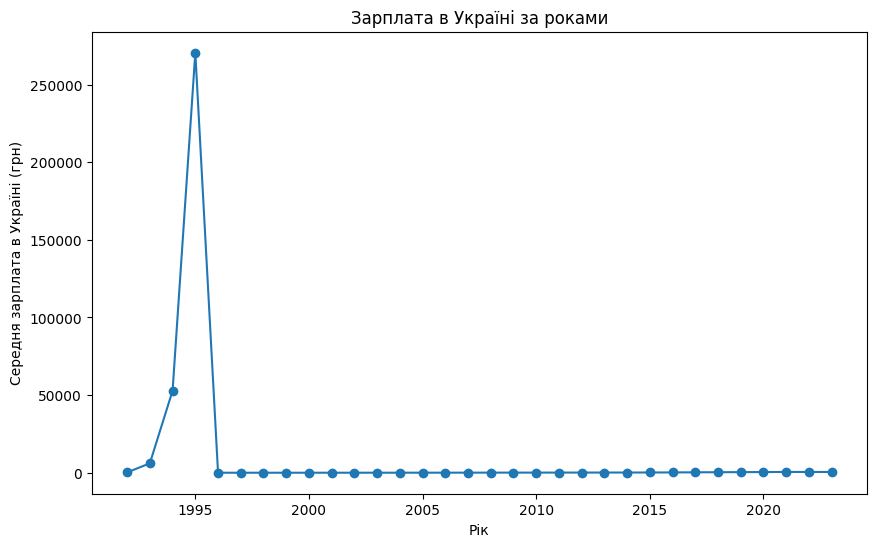

In [93]:
import matplotlib.pyplot as plt

# Створення графіку
plt.figure(figsize=(10, 6))

# Додаємо дані на графік (роки на осі X, середня зарплата в Україні на осі Y)
plt.plot(data['Рік'], data['В національній валюті'], marker='o')

# Додаємо назви осей та заголовок
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в Україні (грн)')
plt.title('Зарплата в Україні за роками')

# Відображення графіку
plt.show()

Завдання 14. Видаліть останній рік з таблиці та виведіть оновлену таблицю. 

In [94]:
# Видалення останнього року
data.drop(data.index[-1], axis=0, inplace=True)

# Виведення оновленої таблиці
print(data)

     Рік  В національній валюті  В доларах США
0   1992                5832.88     216.032593
1   1993              163533.00    6056.777778
2   1994             1426343.00   52827.518519
3   1995             7304000.00  270518.518519
4   1996                 125.23       4.638148
5   1997                 143.09       5.299630
6   1998                 152.83       5.660370
7   1999                 177.39       6.570000
8   2000                 231.04       8.557037
9   2001                 311.62      11.541481
10  2002                 375.98      13.925185
11  2003                 462.58      17.132593
12  2004                 590.53      21.871481
13  2005                 806.14      29.857037
14  2006                1042.88      38.625185
15  2007                1352.75      50.101852
16  2008                1808.92      66.997037
17  2009                1909.25      70.712963
18  2010                2246.75      83.212963
19  2011                2639.17      97.747037
20  2012     

Завдання 15. Побудуйте графік, що відображає середню зарплату в Україні в розрізі років без останнього року. 

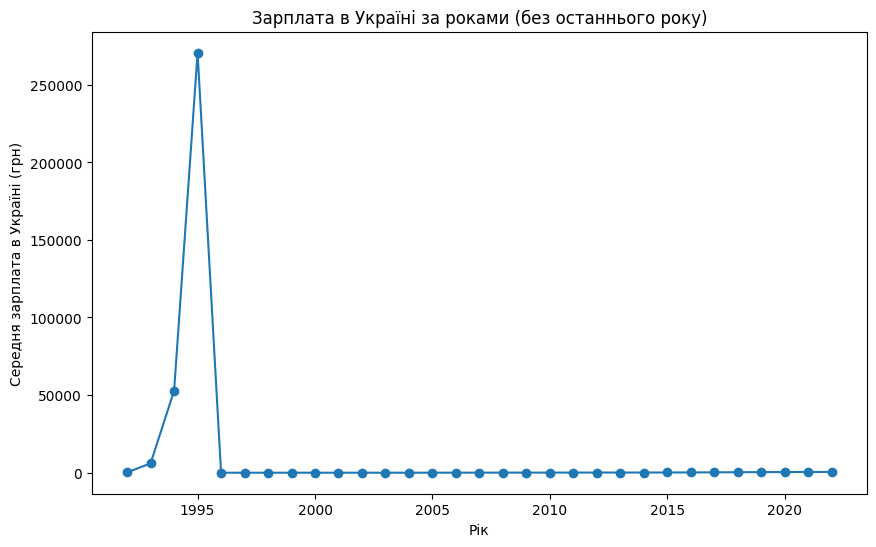

In [98]:
import matplotlib.pyplot as plt

# Створення графіку
plt.figure(figsize=(10, 6))

# Додаємо дані на графік (роки на осі X, середня зарплата в Україні на осі Y)
plt.plot(data['Рік'], data['В національній валюті'], marker='o')

# Додаємо назви осей та заголовок
plt.xlabel('Рік')
plt.ylabel('Середня зарплата в Україні (грн)')
plt.title('Зарплата в Україні за роками (без останнього року)')

# Відображення графіку
plt.show()

Завдання 16. Обчисліть зарплату за останні два роки і порівняйте її із зарплатою за останні 5 років. Вкажіть, чи є різниця, і в якому напрямку.

In [100]:
# Обчислюємо середню зарплату за останні два роки
average_salary_last_two_years = data['В національній валюті'][-2:].mean()

# Обчислюємо середню зарплату за останні 5 років
average_salary_last_five_years = data['В національній валюті'][-5:].mean()

# Порівнюємо середні зарплати
if average_salary_last_two_years > average_salary_last_five_years:
    print(f"Середня зарплата за останні два роки вище, ніж за останні 5 років.")
elif average_salary_last_two_years < average_salary_last_five_years:
    print(f"Середня зарплата за останні два роки нижче, ніж за останні 5 років.")
else:
    print(f"Середня зарплата за останні два роки дорівнює середній зарплаті за останні 5 років.")

Середня зарплата за останні два роки вище, ніж за останні 5 років.


Висновок:
При виконанні даної практичної роботи я використовував мову програмування Python та бібліотеку NumPy для зчитуання таблиці і аналізу її даних. Також була використана бібліотека matplotlib.pyplot для побудови графіків.